In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider

provider = SaverProvider()

# Parameters

In [3]:
# Fixed parameters

DEVICE = 'ibm_sherbrooke'
_RESETS = False

backend = provider.get_backend(DEVICE)

In [4]:
# Variable parameters
import numpy as np

logicals = ['0', '1']
x_basis = [True, False]

rounds = [10, 20, 30, 40, 50, 75, 100]


print("rounds:", rounds)


rounds: [10, 20, 30, 40, 50, 75, 100]


# Find the best layout

Trying RepCode string of length 109 => distance 55...
Trying RepCode string of length 107 => distance 54...
Trying RepCode string of length 105 => distance 53...
Trying RepCode string of length 103 => distance 52...


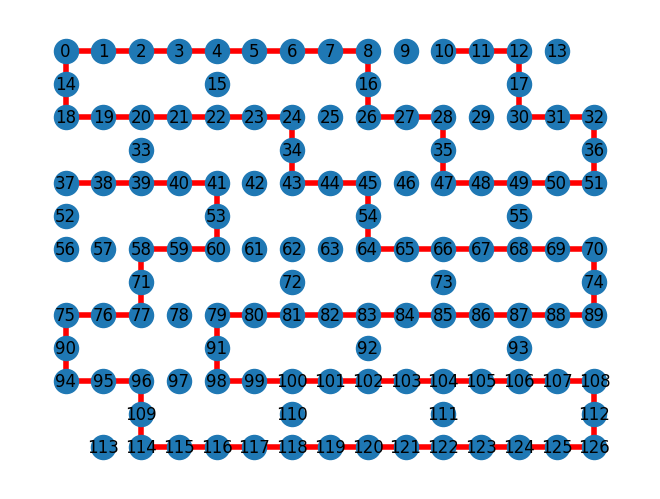

In [12]:
from soft_info import BackendEvaluator

evaluator = BackendEvaluator(backend)
longest_path, _, _, path_info = evaluator.find_longest_good_RepCode_string(plot=True)

In [6]:
path_info

{'mean_gate_error': 0.007963147793478936,
 'min_gate_error': 0.0034766228550469347,
 'max_gate_error': 0.0232547718972346,
 'mean_readout_error': 0.02268317152103559,
 'min_readout_error': 0.0019000000000000128,
 'max_readout_error': 0.3568,
 'mean_ancilla_error': 0.021926797385620922,
 'min_ancilla_error': 0.0019000000000000128,
 'max_ancilla_error': 0.24750000000000005}

In [7]:
link_qubits = longest_path[1::2]
code_qubits = longest_path[0::2]
layout = link_qubits + code_qubits
distance = len(code_qubits)
print("longest path:", longest_path)
print("layout:", layout)
print("distance:", distance)

longest path: [10, 11, 12, 17, 30, 31, 32, 36, 51, 50, 49, 48, 47, 35, 28, 27, 26, 16, 8, 7, 6, 5, 4, 3, 2, 1, 0, 14, 18, 19, 20, 21, 22, 23, 24, 34, 43, 44, 45, 54, 64, 65, 66, 67, 68, 69, 70, 74, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 91, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 112, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 109, 96, 95, 94, 90, 75, 76, 77, 71, 58, 59, 60, 53, 41, 40, 39, 38, 37]
layout: [11, 17, 31, 36, 50, 48, 35, 27, 16, 7, 5, 3, 1, 14, 19, 21, 23, 34, 44, 54, 65, 67, 69, 74, 88, 86, 84, 82, 80, 91, 99, 101, 103, 105, 107, 112, 125, 123, 121, 119, 117, 115, 109, 95, 90, 76, 71, 59, 53, 40, 38, 10, 12, 30, 32, 51, 49, 47, 28, 26, 8, 6, 4, 2, 0, 18, 20, 22, 24, 43, 45, 64, 66, 68, 70, 89, 87, 85, 83, 81, 79, 98, 100, 102, 104, 106, 108, 126, 124, 122, 120, 118, 116, 114, 96, 94, 75, 77, 58, 60, 41, 39, 37]
distance: 52


# No rounds loop

In [8]:
from qiskit_qec.circuits import RepetitionCodeCircuit
from soft_info import run_IQ_calibration
from qiskit import transpile
from Scratch import metadata_helper
from tqdm import tqdm


############################

# Round index
round_index = 0

# Z = 0
xbasis = False
logical = '0'

############################

T = rounds[round_index]
REPETITIONS = 20

code = RepetitionCodeCircuit(distance, T, xbasis=xbasis)
qc = code.circuit[logical]

# Add repdelay at the end of the circuit 
range_rd = backend.configuration().rep_delay_range
qc.barrier()
qc.delay(unit='s', duration=4*range_rd[1])
qc.barrier()

# Transpile and run
transpiled_qc = transpile(qc, backend, initial_layout=layout, optimization_level=1) 
n_shots = int(4e6/((distance-1)*T+2*distance-1)) # Exact shot formula to have exactly 4M shots per job
metadata = metadata_helper(descr='subset RepCodes', code="RepetitionCodeCircuit", 
                            distance=distance, rounds=T, logical=logical, xbasis=xbasis,
                            path_info=path_info)

# Run calibration
calib_shots = int(4e6/backend.configuration().n_qubits)
run_IQ_calibration(backend, shots=calib_shots)


for _ in tqdm(range(REPETITIONS)):
        backend.run(metadata, transpiled_qc, shots=n_shots, meas_level=1, meas_return='single', 
                job_tags=[f'Subset {distance}, {T} rounds, {logical} log, xbasis={xbasis}'])
        
# Run calibration
run_IQ_calibration(backend, shots=calib_shots)


12:35:31 Warning: updating metadata. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/libs/qiskit-saver-provider/result_saver/provider/saver_provider.py, LINE: 46


100%|██████████| 20/20 [01:08<00:00,  3.44s/it]


In [9]:
############################

# Z = 1
xbasis = False
logical = '1'

############################

T = rounds[round_index]
REPETITIONS = 20

code = RepetitionCodeCircuit(distance, T, xbasis=xbasis)
qc = code.circuit[logical]

# Add repdelay at the end of the circuit 
range_rd = backend.configuration().rep_delay_range
qc.barrier()
qc.delay(unit='s', duration=4*range_rd[1])
qc.barrier()

# Transpile and run
transpiled_qc = transpile(qc, backend, initial_layout=layout, optimization_level=1) 
n_shots = int(4e6/((distance-1)*T+2*distance-1)) # Exact shot formula to have exactly 4M shots per job
metadata = metadata_helper(descr='subset RepCodes', code="RepetitionCodeCircuit", 
                            distance=distance, rounds=T, logical=logical, xbasis=xbasis,
                            path_info=path_info)

# Run calibration
calib_shots = int(4e6/backend.configuration().n_qubits)
run_IQ_calibration(backend, shots=calib_shots)


for _ in tqdm(range(REPETITIONS)):
        backend.run(metadata, transpiled_qc, shots=n_shots, meas_level=1, meas_return='single', 
                job_tags=[f'Subset {distance}, {T} rounds, {logical} log, xbasis={xbasis}'])
        
# Run calibration
run_IQ_calibration(backend, shots=calib_shots)

12:40:35 Warning: updating metadata. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/libs/qiskit-saver-provider/result_saver/provider/saver_provider.py, LINE: 46


100%|██████████| 20/20 [00:54<00:00,  2.75s/it]


In [10]:
############################

# X = 0
xbasis = True
logical = '0'

############################

T = rounds[round_index]
REPETITIONS = 20

code = RepetitionCodeCircuit(distance, T, xbasis=xbasis)
qc = code.circuit[logical]

# Add repdelay at the end of the circuit 
range_rd = backend.configuration().rep_delay_range
qc.barrier()
qc.delay(unit='s', duration=4*range_rd[1])
qc.barrier()

# Transpile and run
transpiled_qc = transpile(qc, backend, initial_layout=layout, optimization_level=1) 
n_shots = int(4e6/((distance-1)*T+2*distance-1)) # Exact shot formula to have exactly 4M shots per job
metadata = metadata_helper(descr='subset RepCodes', code="RepetitionCodeCircuit", 
                            distance=distance, rounds=T, logical=logical, xbasis=xbasis,
                            path_info=path_info)

# Run calibration
calib_shots = int(4e6/backend.configuration().n_qubits)
run_IQ_calibration(backend, shots=calib_shots)


for _ in tqdm(range(REPETITIONS)):
        backend.run(metadata, transpiled_qc, shots=n_shots, meas_level=1, meas_return='single', 
                job_tags=[f'Subset {distance}, {T} rounds, {logical} log, xbasis={xbasis}'])
        
# Run calibration
run_IQ_calibration(backend, shots=calib_shots)

12:42:20 Warning: updating metadata. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/libs/qiskit-saver-provider/result_saver/provider/saver_provider.py, LINE: 46


100%|██████████| 20/20 [00:52<00:00,  2.64s/it]


In [11]:
############################

# X = 1
xbasis = True
logical = '1'

############################

T = rounds[round_index]
REPETITIONS = 20

code = RepetitionCodeCircuit(distance, T, xbasis=xbasis)
qc = code.circuit[logical]

# Add repdelay at the end of the circuit 
range_rd = backend.configuration().rep_delay_range
qc.barrier()
qc.delay(unit='s', duration=4*range_rd[1])
qc.barrier()

# Transpile and run
transpiled_qc = transpile(qc, backend, initial_layout=layout, optimization_level=1) 
n_shots = int(4e6/((distance-1)*T+2*distance-1)) # Exact shot formula to have exactly 4M shots per job
metadata = metadata_helper(descr='subset RepCodes', code="RepetitionCodeCircuit", 
                            distance=distance, rounds=T, logical=logical, xbasis=xbasis,
                            path_info=path_info)

# Run calibration
calib_shots = int(4e6/backend.configuration().n_qubits)
run_IQ_calibration(backend, shots=calib_shots)


for _ in tqdm(range(REPETITIONS)):
        backend.run(metadata, transpiled_qc, shots=n_shots, meas_level=1, meas_return='single', 
                job_tags=[f'Subset {distance}, {T} rounds, {logical} log, xbasis={xbasis}'])
        
# Run calibration
run_IQ_calibration(backend, shots=calib_shots)

100%|██████████| 20/20 [00:56<00:00,  2.83s/it]


# Round loop!

In [30]:

# Z = 0
xbasis = False
logical = '0'

# Run calibration

for T in rounds:
    code = RepetitionCodeCircuit(distance, T, xbasis=xbasis)
    qc = code.circuit[logical]
    transpiled_qc = transpile(qc, backend, initial_layout=layout, optimization_level=1) 

    n_shots = int(4e6/((distance-1)*T+2*distance-1)) # Exact shot formula to have exactly 4M shots per job
    metadata = metadata_helper(descr='subset RepCodes', code="RepetitionCodeCircuit", 
                               distance=distance, rounds=T, logical=logical, xbasis=xbasis,
                               path_info=path_info)

    # backend.run(metadata, transpiled_qc, shots=n_shots, meas_level=1, meas_return='single', 
    #             job_tags=[f'Subset {distance}, {T} rounds, {logical} log, xbasis={xbasis}'])

# Run calibration
    

{'descr': 'subset RepCodes', 'code': 'RepetitionCodeCircuit', 'distance': 52, 'rounds': 10, 'logical': '0', 'xbasis': False, 'path_info': {'mean_gate_error': 0.007963147793478936, 'min_gate_error': 0.0034766228550469347, 'max_gate_error': 0.0232547718972346, 'mean_readout_error': 0.022770873786407766, 'min_readout_error': 0.0019000000000000128, 'max_readout_error': 0.3568, 'mean_ancilla_error': 0.02186078431372549, 'min_ancilla_error': 0.0019000000000000128, 'max_ancilla_error': 0.24750000000000005}}
{'descr': 'subset RepCodes', 'code': 'RepetitionCodeCircuit', 'distance': 52, 'rounds': 20, 'logical': '0', 'xbasis': False, 'path_info': {'mean_gate_error': 0.007963147793478936, 'min_gate_error': 0.0034766228550469347, 'max_gate_error': 0.0232547718972346, 'mean_readout_error': 0.022770873786407766, 'min_readout_error': 0.0019000000000000128, 'max_readout_error': 0.3568, 'mean_ancilla_error': 0.02186078431372549, 'min_ancilla_error': 0.0019000000000000128, 'max_ancilla_error': 0.24750000